In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df = pd.read_table("C:/Users/Cemo/Desktop/Panteon - Game Data Analyst - Experiment Data.tsv")
df.head(15)

,Baseline,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Date,Installs,Revenue,Game Actions,Crashes,D1 Retention,D7 Retention
1,19/09/2023,1080,981.00,1111,120,25%,7%
2,20/09/2023,1659,647.00,1662,56,30%,12%
3,21/09/2023,849,843.00,869,49,27%,14%
4,22/09/2023,741,172.00,1743,50,22%,9%
5,23/09/2023,1804,530.00,1881,203,32%,8%
6,24/09/2023,1599,7390.00,1635,84,28%,14%
7,25/09/2023,1997,965.00,2084,197,34%,15%
8,Variant,NaN,NaN,NaN,NaN,NaN,NaN
9,Date,Installs,Revenue,Game Actions,Crashes,D1 Retention,D7 Retention


In [3]:
df = df.drop(0).reset_index(drop=True)

In [4]:
df.columns = ["Date", "Installs", "Revenue", "Game Actions", "Crashes", "D1 Retention", "D7 Retention"]


In [5]:
df = df[~df["Date"].isin(["Variant", "Date"])].reset_index(drop=True)


In [6]:
df.head(14)

,Date,Installs,Revenue,Game Actions,Crashes,D1 Retention,D7 Retention
0,19/09/2023,1080,981.00,1111,120,25%,7%
1,20/09/2023,1659,647.00,1662,56,30%,12%
2,21/09/2023,849,843.00,869,49,27%,14%
3,22/09/2023,741,172.00,1743,50,22%,9%
4,23/09/2023,1804,530.00,1881,203,32%,8%
5,24/09/2023,1599,7390.00,1635,84,28%,14%
6,25/09/2023,1997,965.00,2084,197,34%,15%
7,19/09/2023,1051,1497.00,1103,9,26%,13%
8,20/09/2023,1157,3785.00,1222,44,31%,16%
9,21/09/2023,1502,313.00,1529,147,23%,8%


In [7]:
df = df[~df["Date"].isin(["Variant", "Date"])].reset_index(drop=True)


In [8]:
df["Installs"] = pd.to_numeric(df["Installs"].str.replace(",", ""), errors="coerce")
df["Revenue"] = pd.to_numeric(df["Revenue"].str.replace(",", ""), errors="coerce")
df["Game Actions"] = pd.to_numeric(df["Game Actions"].str.replace(",", ""), errors="coerce")
df["Crashes"] = pd.to_numeric(df["Crashes"].str.replace(",", ""), errors="coerce")

In [9]:
df["D1 Retention"] = pd.to_numeric(df["D1 Retention"].str.rstrip("%"), errors="coerce") / 100
df["D7 Retention"] = pd.to_numeric(df["D7 Retention"].str.rstrip("%"), errors="coerce") / 100


In [10]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce", dayfirst=True)


In [11]:
mid_point = len(df) // 2
df["Group"] = ["Baseline" if i < mid_point else "Variant" for i in range(len(df))]


In [12]:
df_baseline = df[df["Group"] == "Baseline"].reset_index(drop=True)
df_variant = df[df["Group"] == "Variant"].reset_index(drop=True)

In [13]:
# Triple Double Check
df.head(14)


,Date,Installs,Revenue,Game Actions,Crashes,D1 Retention,D7 Retention,Group
0,2023-09-19,1080,981.0,1111,120,0.25,0.07,Baseline
1,2023-09-20,1659,647.0,1662,56,0.30,0.12,Baseline
2,2023-09-21,849,843.0,869,49,0.27,0.14,Baseline
3,2023-09-22,741,172.0,1743,50,0.22,0.09,Baseline
4,2023-09-23,1804,530.0,1881,203,0.32,0.08,Baseline
5,2023-09-24,1599,7390.0,1635,84,0.28,0.14,Baseline
6,2023-09-25,1997,965.0,2084,197,0.34,0.15,Baseline
7,2023-09-19,1051,1497.0,1103,9,0.26,0.13,Variant
8,2023-09-20,1157,3785.0,1222,44,0.31,0.16,Variant
9,2023-09-21,1502,313.0,1529,147,0.23,0.08,Variant


In [14]:
df_baseline.head(7)

,Date,Installs,Revenue,Game Actions,Crashes,D1 Retention,D7 Retention,Group
0,2023-09-19,1080,981.0,1111,120,0.25,0.07,Baseline
1,2023-09-20,1659,647.0,1662,56,0.30,0.12,Baseline
2,2023-09-21,849,843.0,869,49,0.27,0.14,Baseline
3,2023-09-22,741,172.0,1743,50,0.22,0.09,Baseline
4,2023-09-23,1804,530.0,1881,203,0.32,0.08,Baseline
5,2023-09-24,1599,7390.0,1635,84,0.28,0.14,Baseline
6,2023-09-25,1997,965.0,2084,197,0.34,0.15,Baseline


In [15]:
df_variant.head(7)

,Date,Installs,Revenue,Game Actions,Crashes,D1 Retention,D7 Retention,Group
0,2023-09-19,1051,1497.0,1103,9,0.26,0.13,Variant
1,2023-09-20,1157,3785.0,1222,44,0.31,0.16,Variant
2,2023-09-21,1502,313.0,1529,147,0.23,0.08,Variant
3,2023-09-22,1807,1822.0,1901,76,0.29,0.15,Variant
4,2023-09-23,1227,578.0,1237,198,0.21,0.10,Variant
5,2023-09-24,708,1111.0,786,184,0.34,0.20,Variant
6,2023-09-25,1507,748.0,1574,2,0.32,0.17,Variant


In [16]:
df_baseline.reset_index(inplace=True)
df_variant.reset_index(inplace=True)

In [17]:
df_combined = pd.concat([df_baseline, df_variant])

C:\Users\Cemo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Cemo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


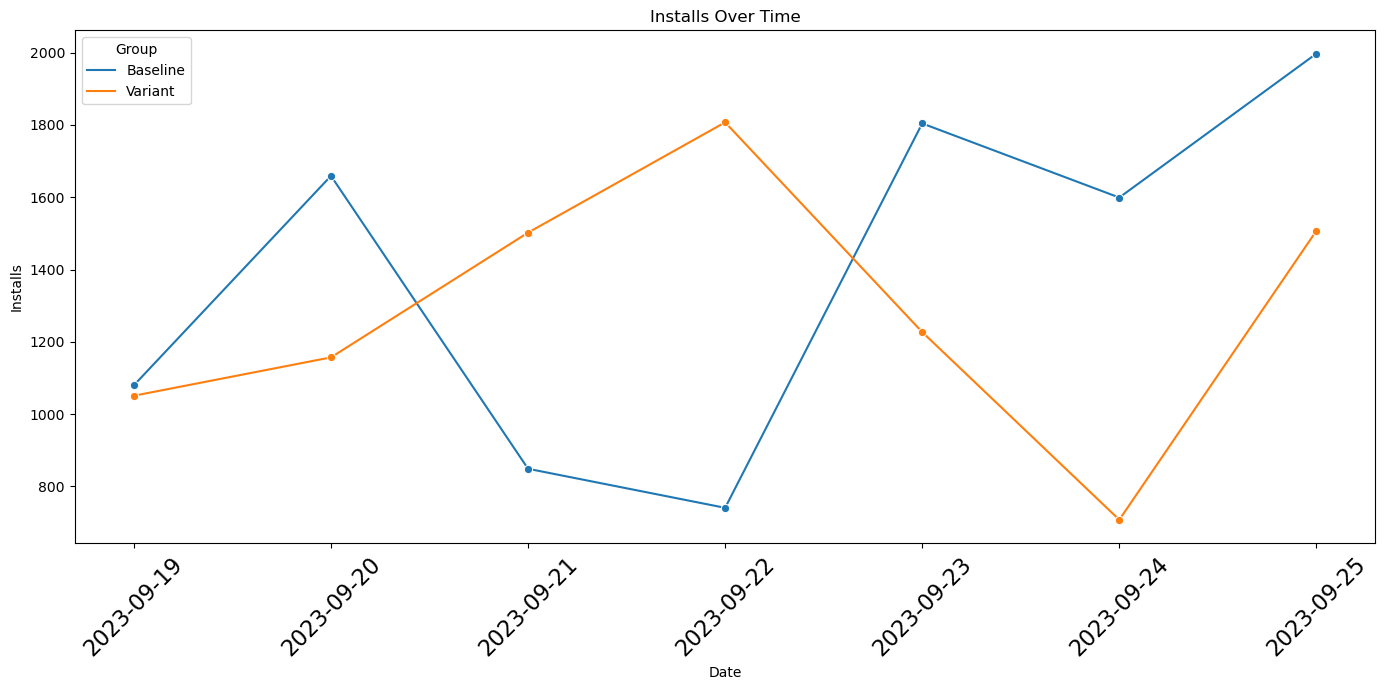

In [18]:
# Time Series Analyses

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_combined, x="Date", y="Installs", hue="Group", marker="o")
plt.title("Installs Over Time")
plt.xlabel("Date")
plt.ylabel("Installs")
plt.xticks(rotation=45,fontsize=16)
plt.tight_layout()
plt.show()

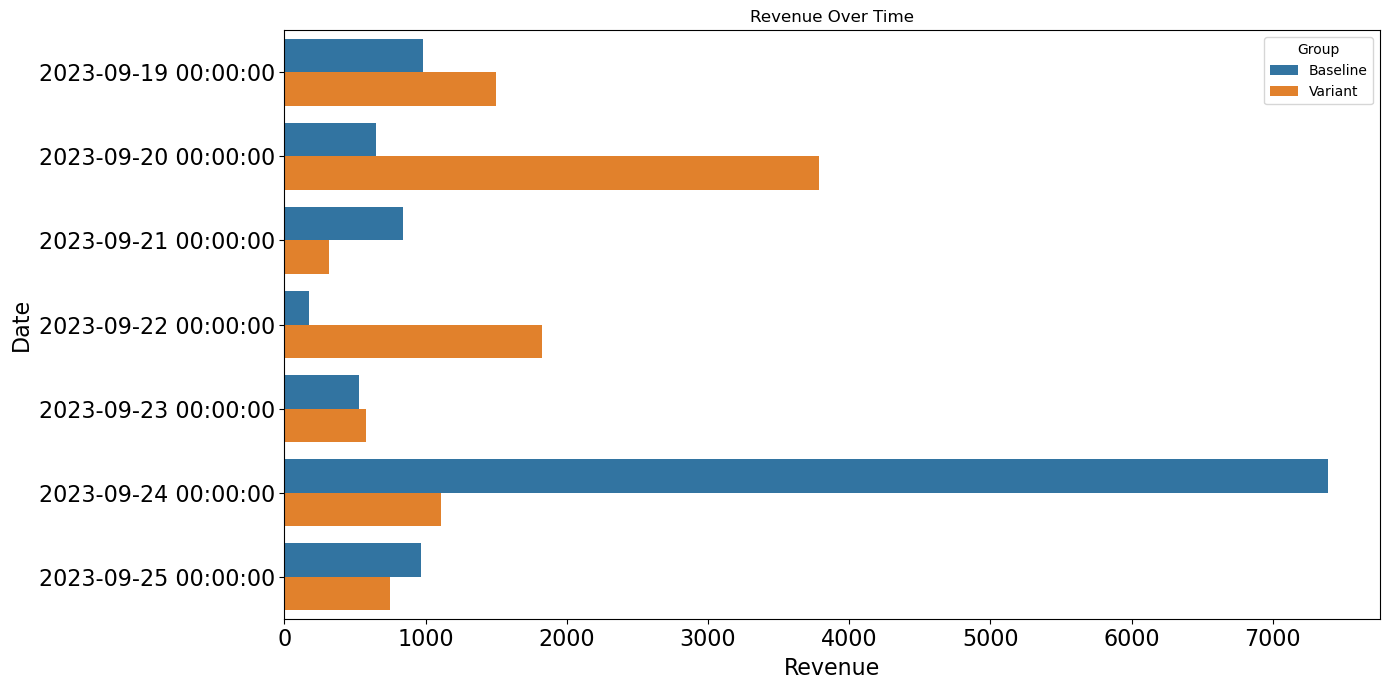

In [19]:
plt.figure(figsize=(14,7))
sns.barplot(data=df_combined,x="Revenue",y="Date",hue="Group")
plt.title("Revenue Over Time")
plt.xlabel("Revenue",fontsize=16)
plt.ylabel("Date",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\Cemo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Cemo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


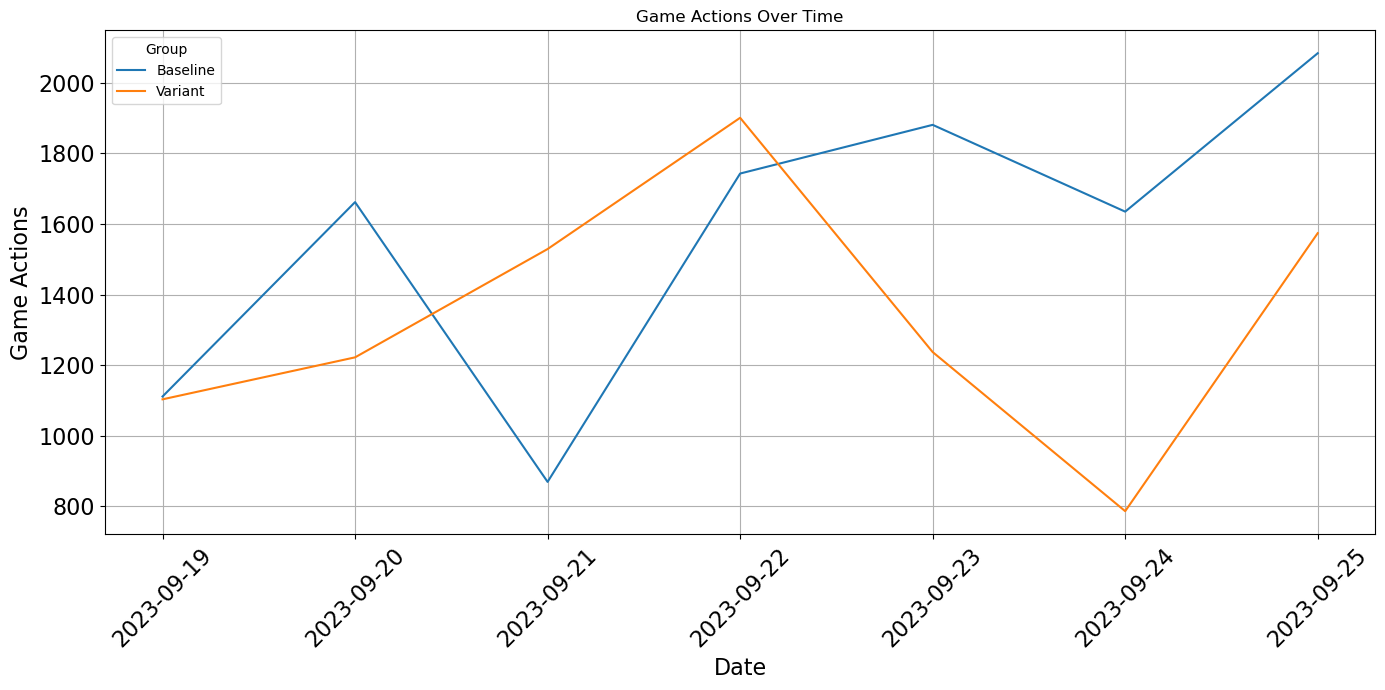

In [20]:
plt.figure(figsize=(14,7))
sns.lineplot(data=df_combined,x="Date",y="Game Actions",hue="Group")
plt.title("Game Actions Over Time")
plt.xlabel("Date",fontsize=16)
plt.ylabel("Game Actions",fontsize=16)
plt.xticks(fontsize=16,rotation=45)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.grid()
plt.show()

C:\Users\Cemo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Cemo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


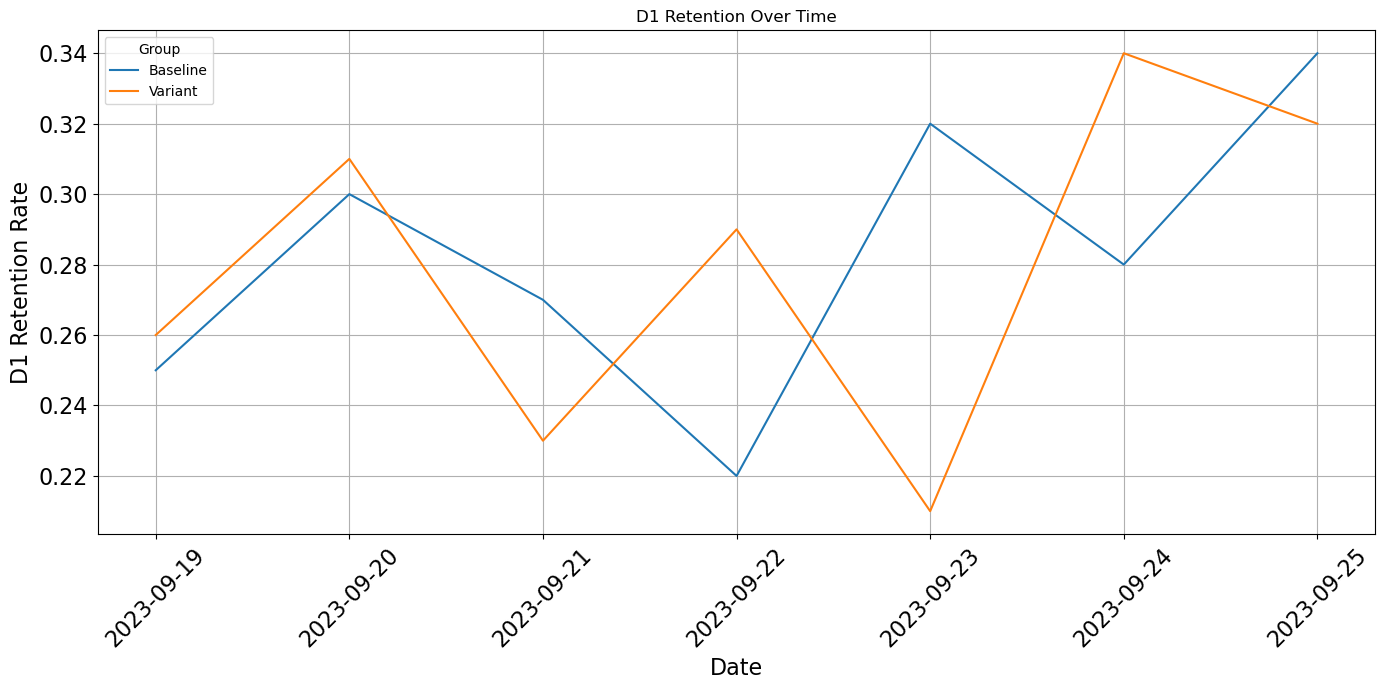

In [21]:
plt.figure(figsize=(14,7))
sns.lineplot(data=df_combined,x="Date",y="D1 Retention",hue="Group")
plt.title("D1 Retention Over Time")
plt.xlabel("Date",fontsize=16)
plt.ylabel("D1 Retention Rate",fontsize=16)
plt.xticks(fontsize=16,rotation=45)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.grid()
plt.show()

C:\Users\Cemo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Cemo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


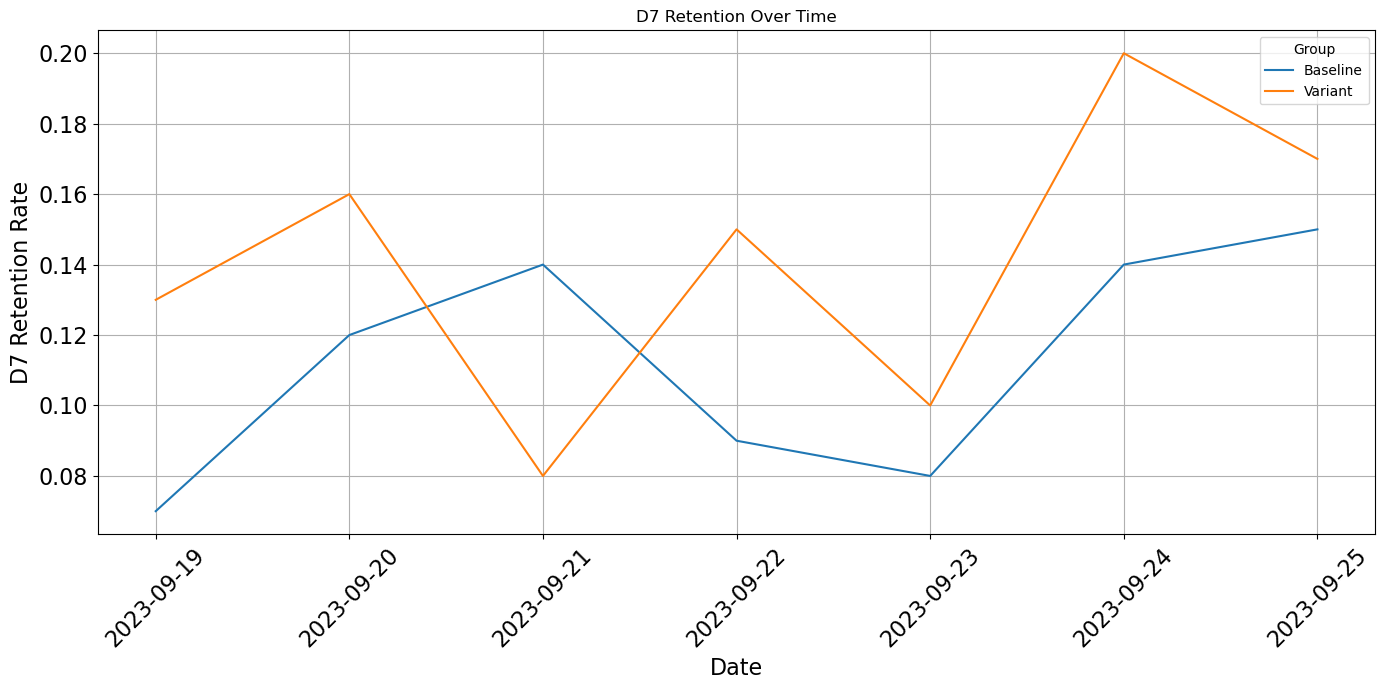

In [22]:
plt.figure(figsize=(14,7))
sns.lineplot(data=df_combined,x="Date",y="D7 Retention",hue="Group")
plt.title("D7 Retention Over Time")
plt.xlabel("Date",fontsize=16)
plt.ylabel("D7 Retention Rate",fontsize=16)
plt.xticks(fontsize=16,rotation=45)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.grid()
plt.show()

C:\Users\Cemo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Cemo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


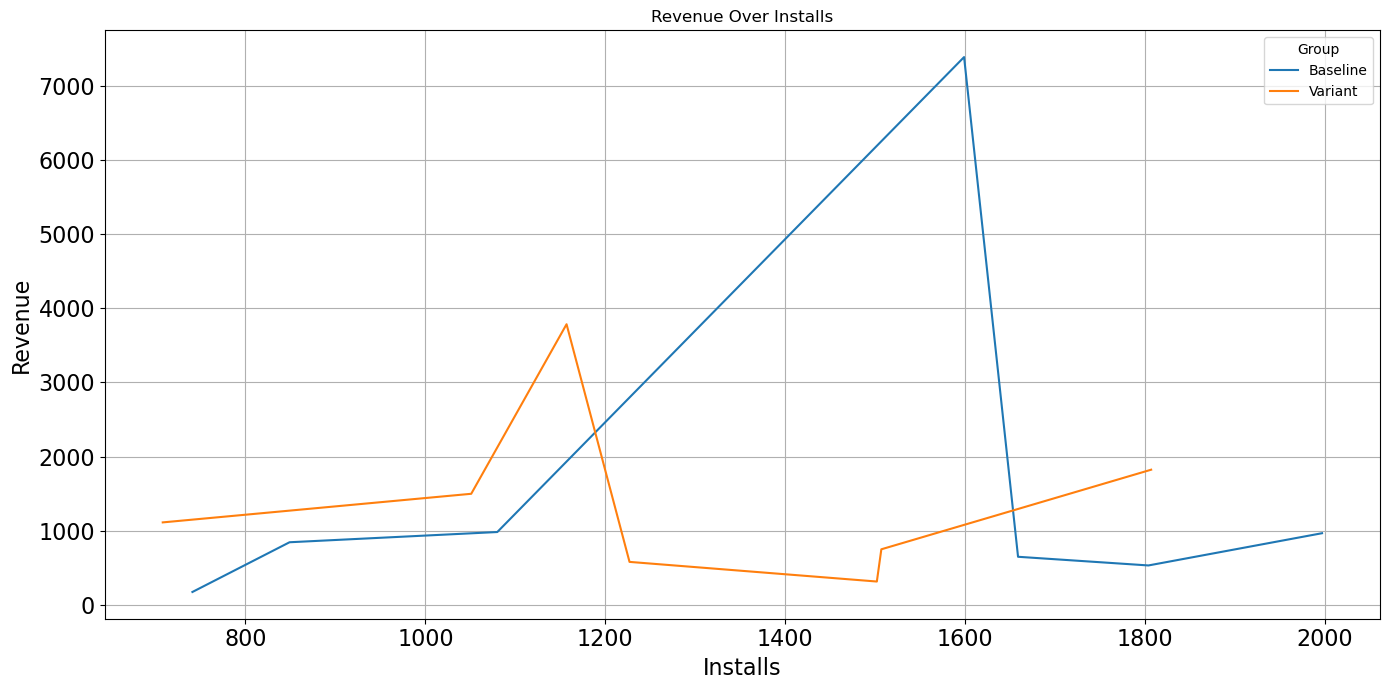

In [23]:
# Lets Check Parameters Synchronized Actions 
plt.figure(figsize=(14,7))
sns.lineplot(data=df_combined,x="Installs",y="Revenue",hue="Group")
plt.title("Revenue Over Installs")
plt.xlabel("Installs",fontsize=16)
plt.ylabel("Revenue",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.grid()
plt.show()


C:\Users\Cemo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Cemo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


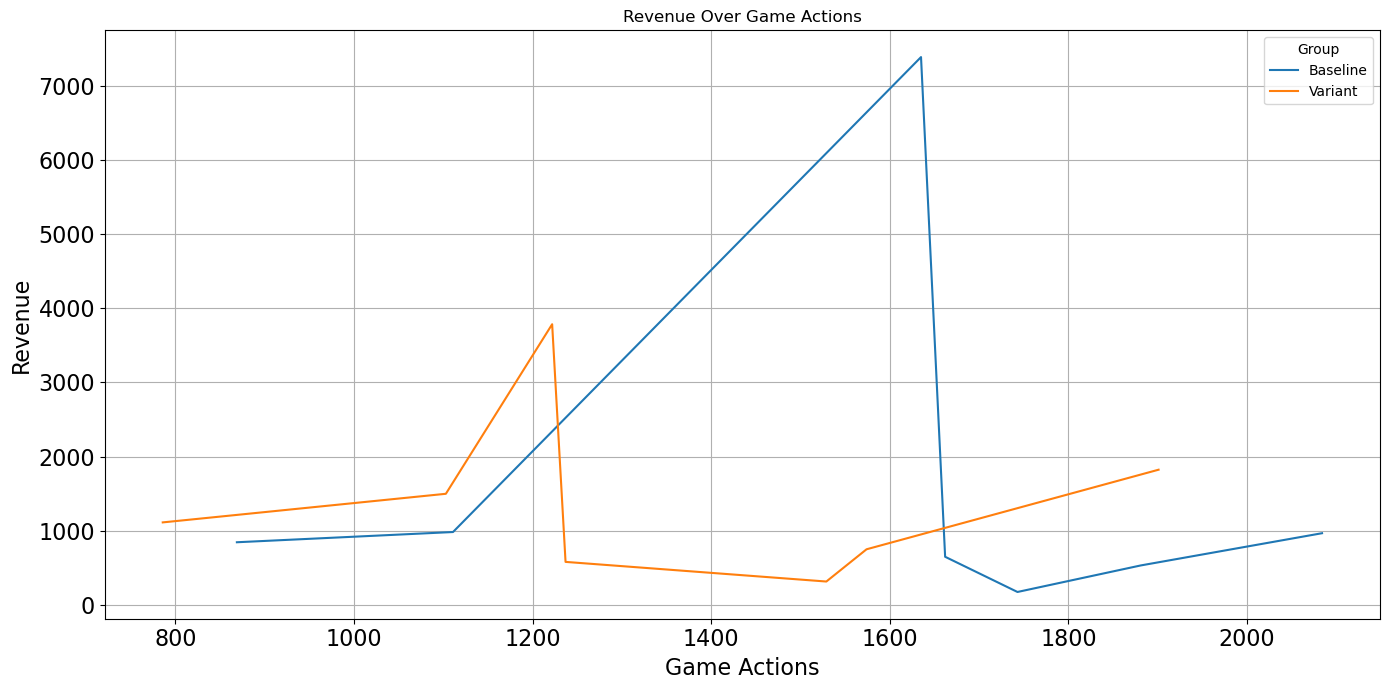

In [24]:
plt.figure(figsize=(14,7))
sns.lineplot(data=df_combined,x="Game Actions",y="Revenue",hue="Group")
plt.title("Revenue Over Game Actions")
plt.xlabel("Game Actions",fontsize=16)
plt.ylabel("Revenue",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.grid()
plt.show()

C:\Users\Cemo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Cemo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


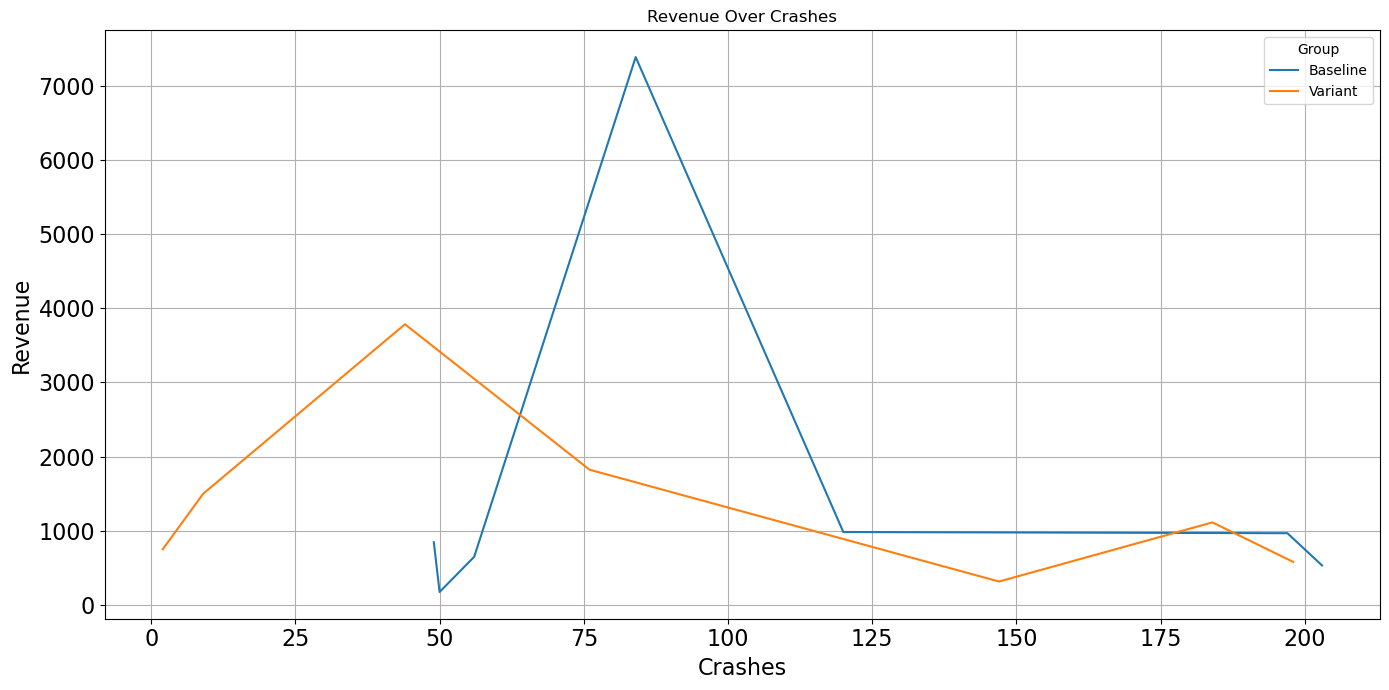

In [25]:
plt.figure(figsize=(14,7))
sns.lineplot(data=df_combined,x="Crashes",y="Revenue",hue="Group")
plt.title("Revenue Over Crashes")
plt.xlabel("Crashes",fontsize=16)
plt.ylabel("Revenue",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.grid()
plt.show()

C:\Users\Cemo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Cemo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


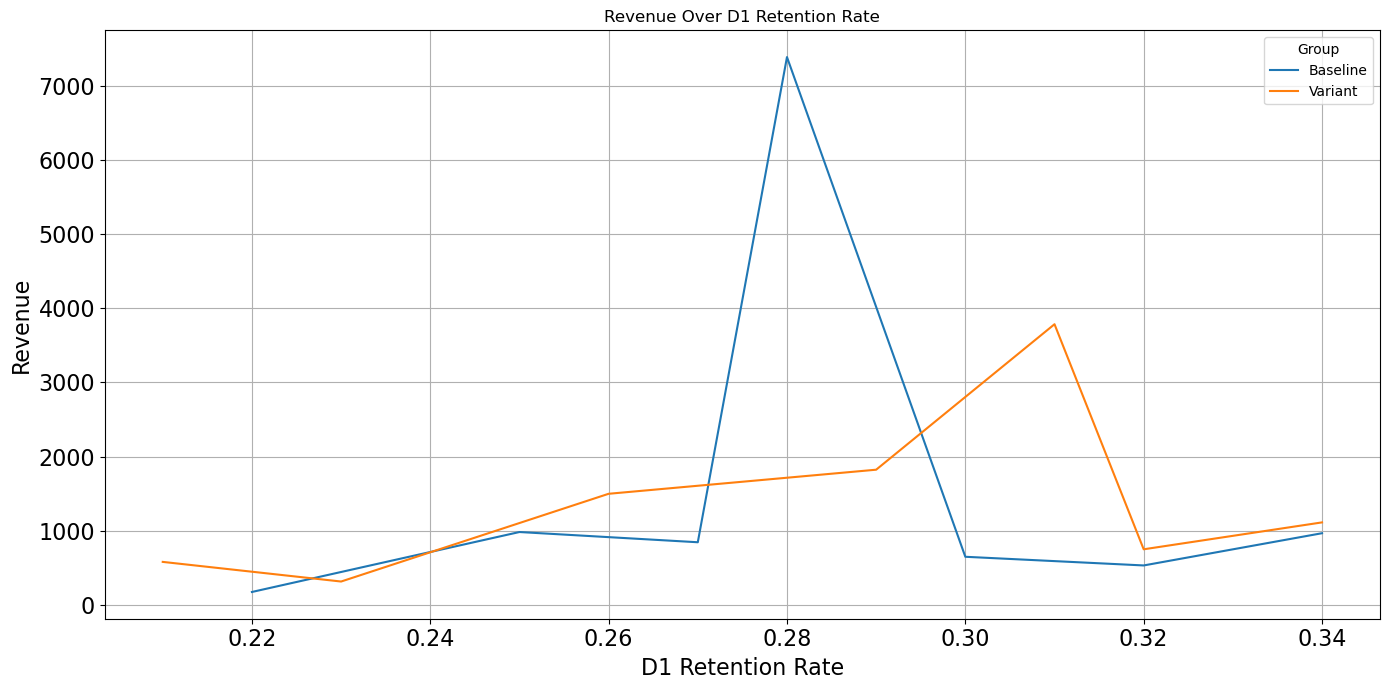

In [26]:
plt.figure(figsize=(14,7))
sns.lineplot(data=df_combined,x="D1 Retention",y="Revenue",hue="Group")
plt.title("Revenue Over D1 Retention Rate")
plt.xlabel("D1 Retention Rate",fontsize=16)
plt.ylabel("Revenue",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.grid()
plt.show()

C:\Users\Cemo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Cemo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


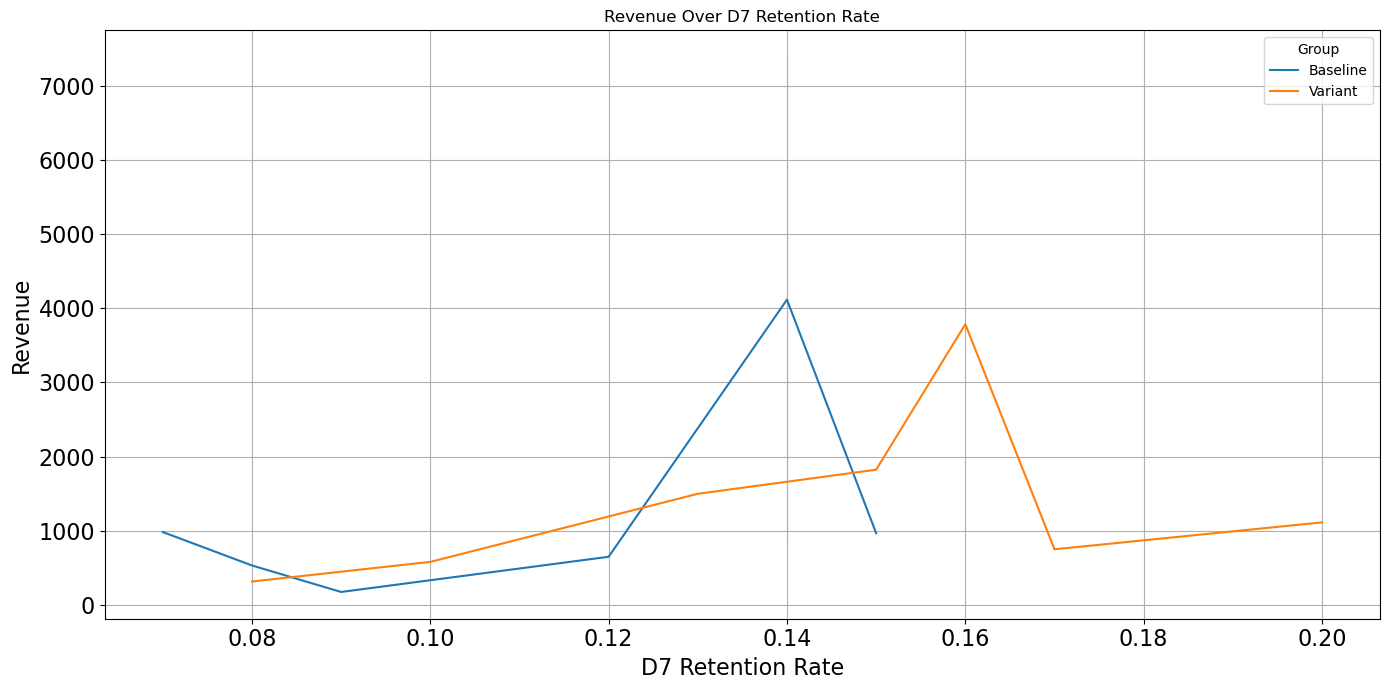

In [27]:
plt.figure(figsize=(14,7))
sns.lineplot(data=df_combined,x="D7 Retention",y="Revenue",hue="Group")
plt.title("Revenue Over D7 Retention Rate")
plt.xlabel("D7 Retention Rate",fontsize=16)
plt.ylabel("Revenue",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.grid()
plt.show()

In [28]:
# T-Test For Revenue
t_stat, p_value = stats.ttest_ind(df_baseline['Revenue'], df_variant['Revenue'], nan_policy='omit')
print(f"For Revenue T-Test: T-Statistics = {t_stat}, p = {p_value}")

# -T-Test for Game Actions
t_stat, p_value = stats.ttest_ind(df_baseline['Game Actions'], df_variant['Game Actions'], nan_policy='omit')
print(f"For Game Actions T-Test: T-Statistics = {t_stat}, p = {p_value}")

# T-Test for D1 Retention
t_stat, p_value = stats.ttest_ind(df_baseline['D1 Retention'], df_variant['D1 Retention'], nan_policy='omit')
print(f"For D1 Retention T-Test: T-Statistics = {t_stat}, p = {p_value}")
# T-Test For D7 Retention
t_stat, p_value = stats.ttest_ind(df_baseline['D7 Retention'], df_variant['D7 Retention'], nan_policy='omit')
print(f"For D7 Retention T-Test: T-Statistics = {t_stat}, p = {p_value}")


For Revenue T-Test: T-Statistics = 0.22558152204029183, p = 0.8253230694258293
For Game Actions T-Test: T-Statistics = 1.097307562727891, p = 0.29403821014228204
For D1 Retention T-Test: T-Statistics = 0.11916871834484272, p = 0.9071134409747039
For D7 Retention T-Test: T-Statistics = -1.4359163172354759, p = 0.17657819559362428


In [29]:
# Basic Statistic Analyses
df.describe()

,Date,Installs,Revenue,Game Actions,Crashes,D1 Retention,D7 Retention
count,14,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,2023-09-22 00:00:00,1334.857143,1527.285714,1452.642857,101.357143,0.281429,0.127143
min,2023-09-19 00:00:00,708.000000,172.000000,786.000000,2.000000,0.210000,0.070000
25%,2023-09-20 06:00:00,1058.250000,595.250000,1138.750000,49.250000,0.252500,0.092500
50%,2023-09-22 00:00:00,1364.500000,904.000000,1551.500000,80.000000,0.285000,0.135000
75%,2023-09-23 18:00:00,1644.000000,1400.500000,1722.750000,174.750000,0.317500,0.150000
max,2023-09-25 00:00:00,1997.000000,7390.000000,2084.000000,203.000000,0.340000,0.200000
std,NaN,419.186365,1909.526741,400.844802,72.404427,0.043120,0.038716


In [30]:
df_baseline.describe()

,index,Date,Installs,Revenue,Game Actions,Crashes,D1 Retention,D7 Retention
count,7.000000,7,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,3.000000,2023-09-22 00:00:00,1389.857143,1646.857143,1569.285714,108.428571,0.282857,0.112857
min,0.000000,2023-09-19 00:00:00,741.000000,172.000000,869.000000,49.000000,0.220000,0.070000
25%,1.500000,2023-09-20 12:00:00,964.500000,588.500000,1373.000000,53.000000,0.260000,0.085000
50%,3.000000,2023-09-22 00:00:00,1599.000000,843.000000,1662.000000,84.000000,0.280000,0.120000
75%,4.500000,2023-09-23 12:00:00,1731.500000,973.000000,1812.000000,158.500000,0.310000,0.140000
max,6.000000,2023-09-25 00:00:00,1997.000000,7390.000000,2084.000000,203.000000,0.340000,0.150000
std,2.160247,NaN,494.278743,2548.216986,429.265541,67.347005,0.041115,0.032514


In [31]:
df_variant.describe()

,index,Date,Installs,Revenue,Game Actions,Crashes,D1 Retention,D7 Retention
count,7.000000,7,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,3.000000,2023-09-22 00:00:00,1279.857143,1407.714286,1336.000000,94.285714,0.280000,0.141429
min,0.000000,2023-09-19 00:00:00,708.000000,313.000000,786.000000,2.000000,0.210000,0.080000
25%,1.500000,2023-09-20 12:00:00,1104.000000,663.000000,1162.500000,26.500000,0.245000,0.115000
50%,3.000000,2023-09-22 00:00:00,1227.000000,1111.000000,1237.000000,76.000000,0.290000,0.150000
75%,4.500000,2023-09-23 12:00:00,1504.500000,1659.500000,1551.500000,165.500000,0.315000,0.165000
max,6.000000,2023-09-25 00:00:00,1807.000000,3785.000000,1901.000000,198.000000,0.340000,0.200000
std,2.160247,NaN,359.653736,1171.976922,363.479481,81.891624,0.048305,0.041404


In [32]:
# Correlation Matrix
df_baseline_corr = df_baseline[["Revenue","Installs", "Game Actions", "Crashes","D1 Retention", "D7 Retention"]]
df_variant_corr = df_variant[["Revenue","Installs", "Game Actions", "Crashes","D1 Retention", "D7 Retention"]]
corr_matrix_base = df_baseline_corr.corr()
corr_matrix_variant = df_variant_corr.corr()

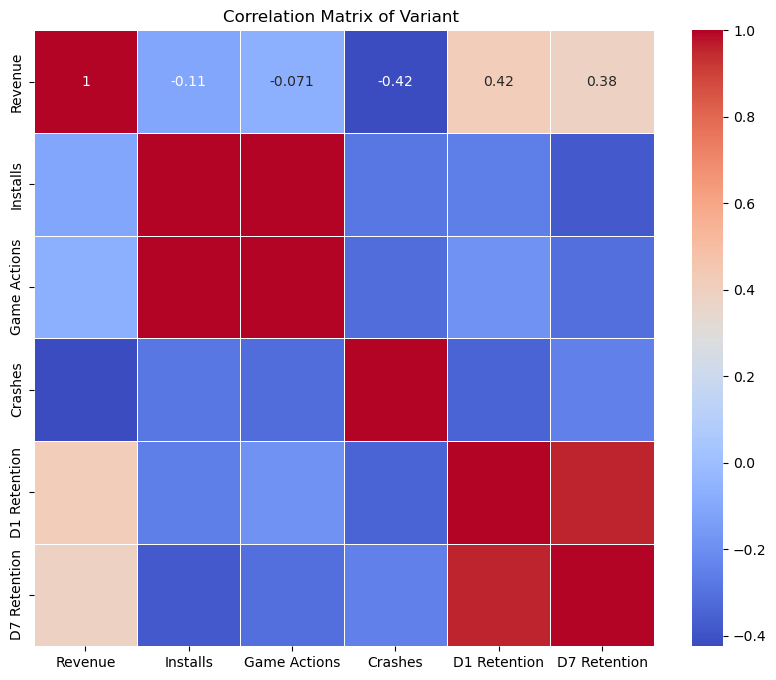

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=corr_matrix_variant, annot=True,  cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Variant ")
plt.show()

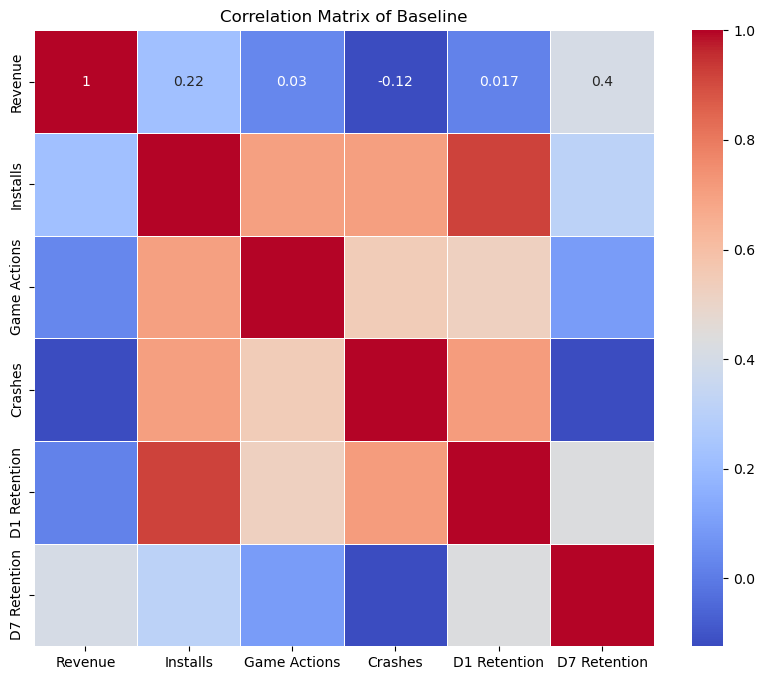

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=corr_matrix_base, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Baseline")
plt.show()